In [1]:
# 01_eda.ipynb

# --- 1.1 Dataset Overview ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('../data/raw/retail_sales_dataset.csv')
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
# Info and statistics
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [3]:
# Check missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Duplicates: 0


In [4]:
# List of columns
print("Available Features:\n", df.columns.tolist())


Available Features:
 ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [5]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Daily Sales Volume
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily Sales']

# Monthly Sales
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales.columns = ['Month', 'Monthly Sales']

# Product Category Sales
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)




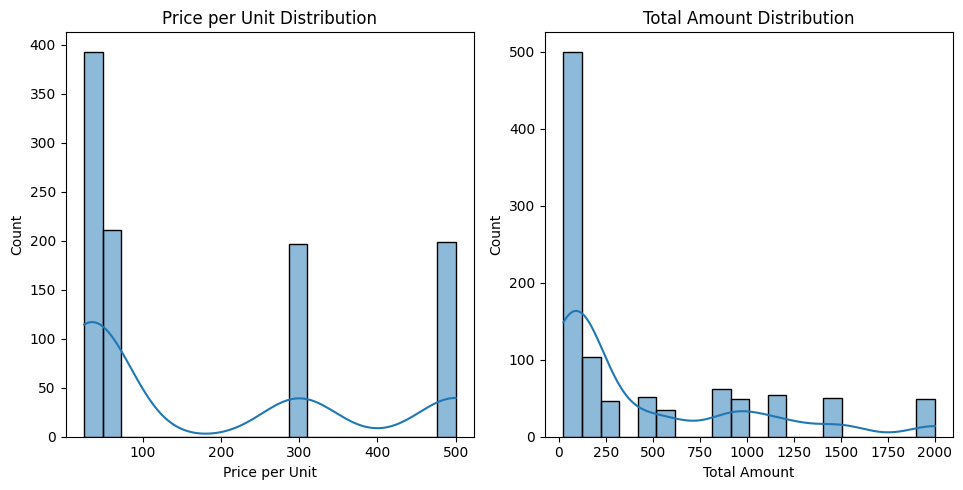

In [6]:
# Distribution of continuous variables
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 2)
sns.histplot(df['Price per Unit'], bins=20, kde=True)
plt.title("Price per Unit Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title("Total Amount Distribution")

plt.tight_layout()
plt.show()


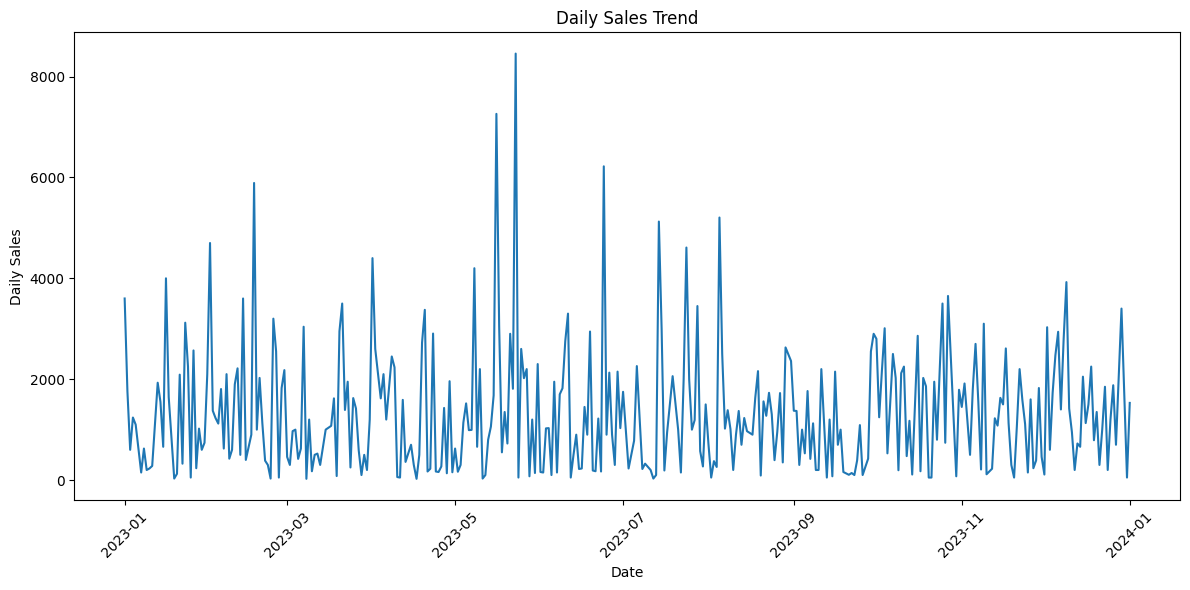

In [7]:
# Time Series plot of Daily Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Daily Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


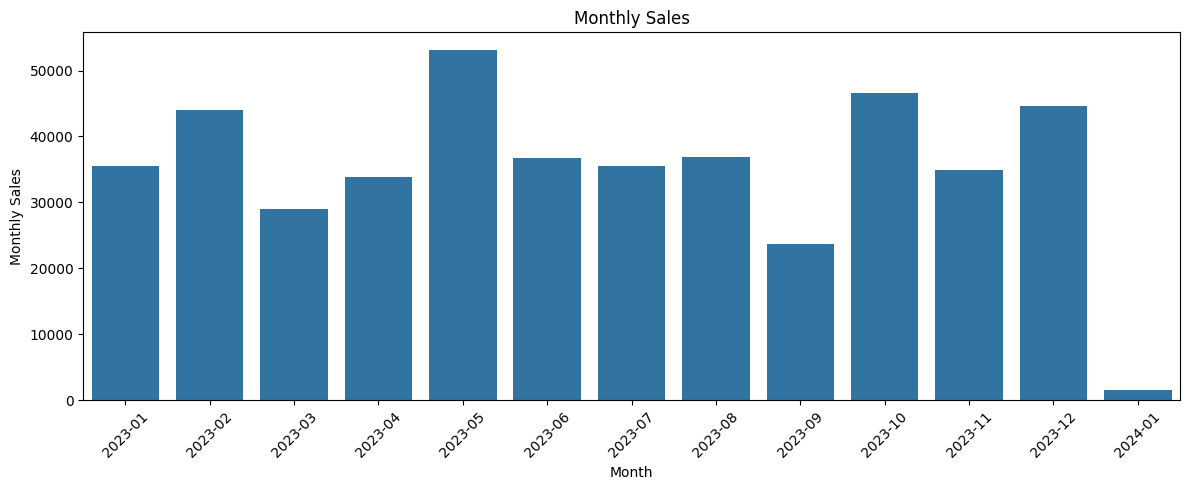

In [8]:
# Monthly Sales Trend
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_sales, x='Month', y='Monthly Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


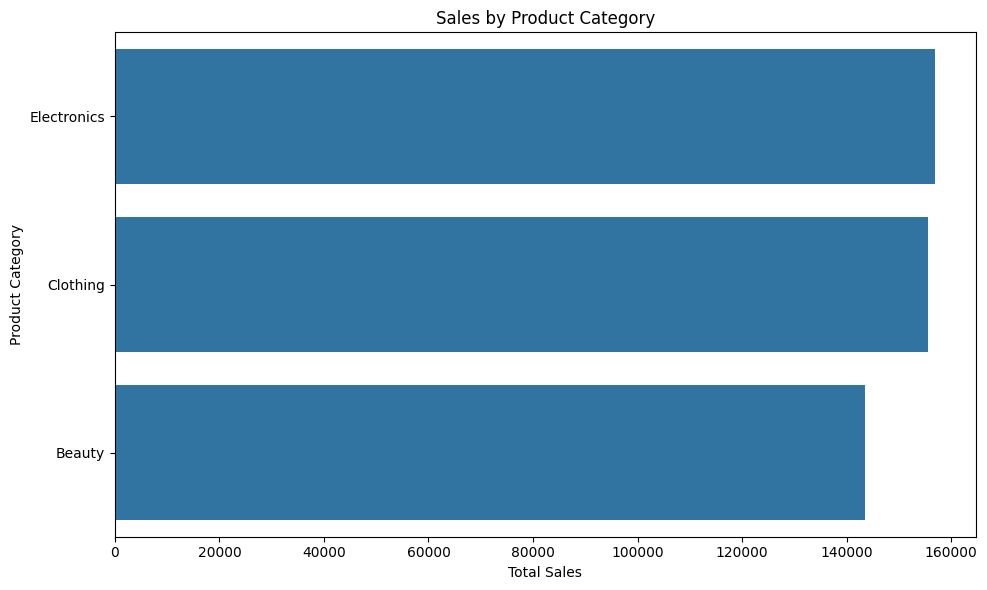

In [9]:
# Product Category Sales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()


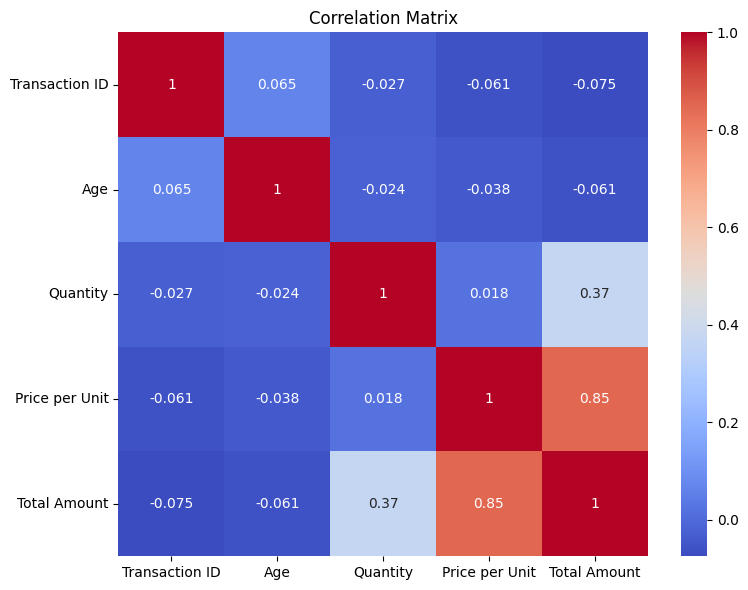

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


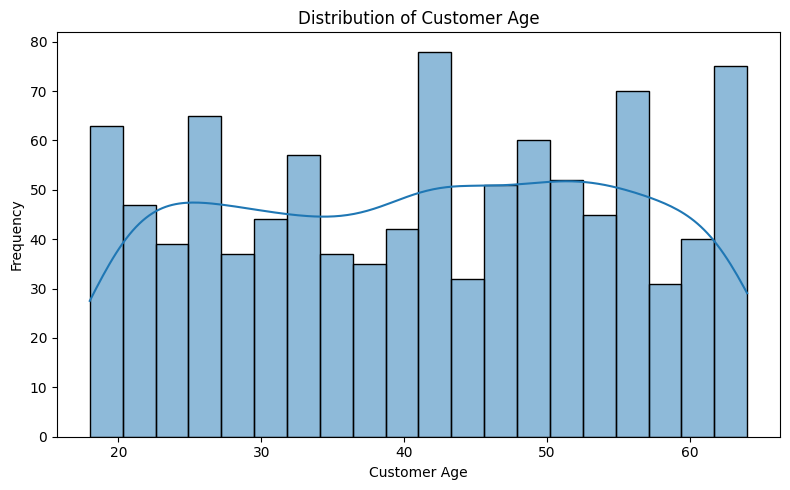

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Save intermediate cleaned version
df.to_csv("../data/processed/cleaned_data.csv", index= False)
